In [2]:
!apt-get install poppler-utils
!pip install pdf2image
!pip install easyocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (663 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, h

In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [4]:
reader = easyocr.Reader(['fr'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
!wget /content/CV-SAMIH.pdf

/content/CV-SAMIH.pdf: Scheme missing.


In [6]:
images = convert_from_path('CV-SAMIH.pdf')

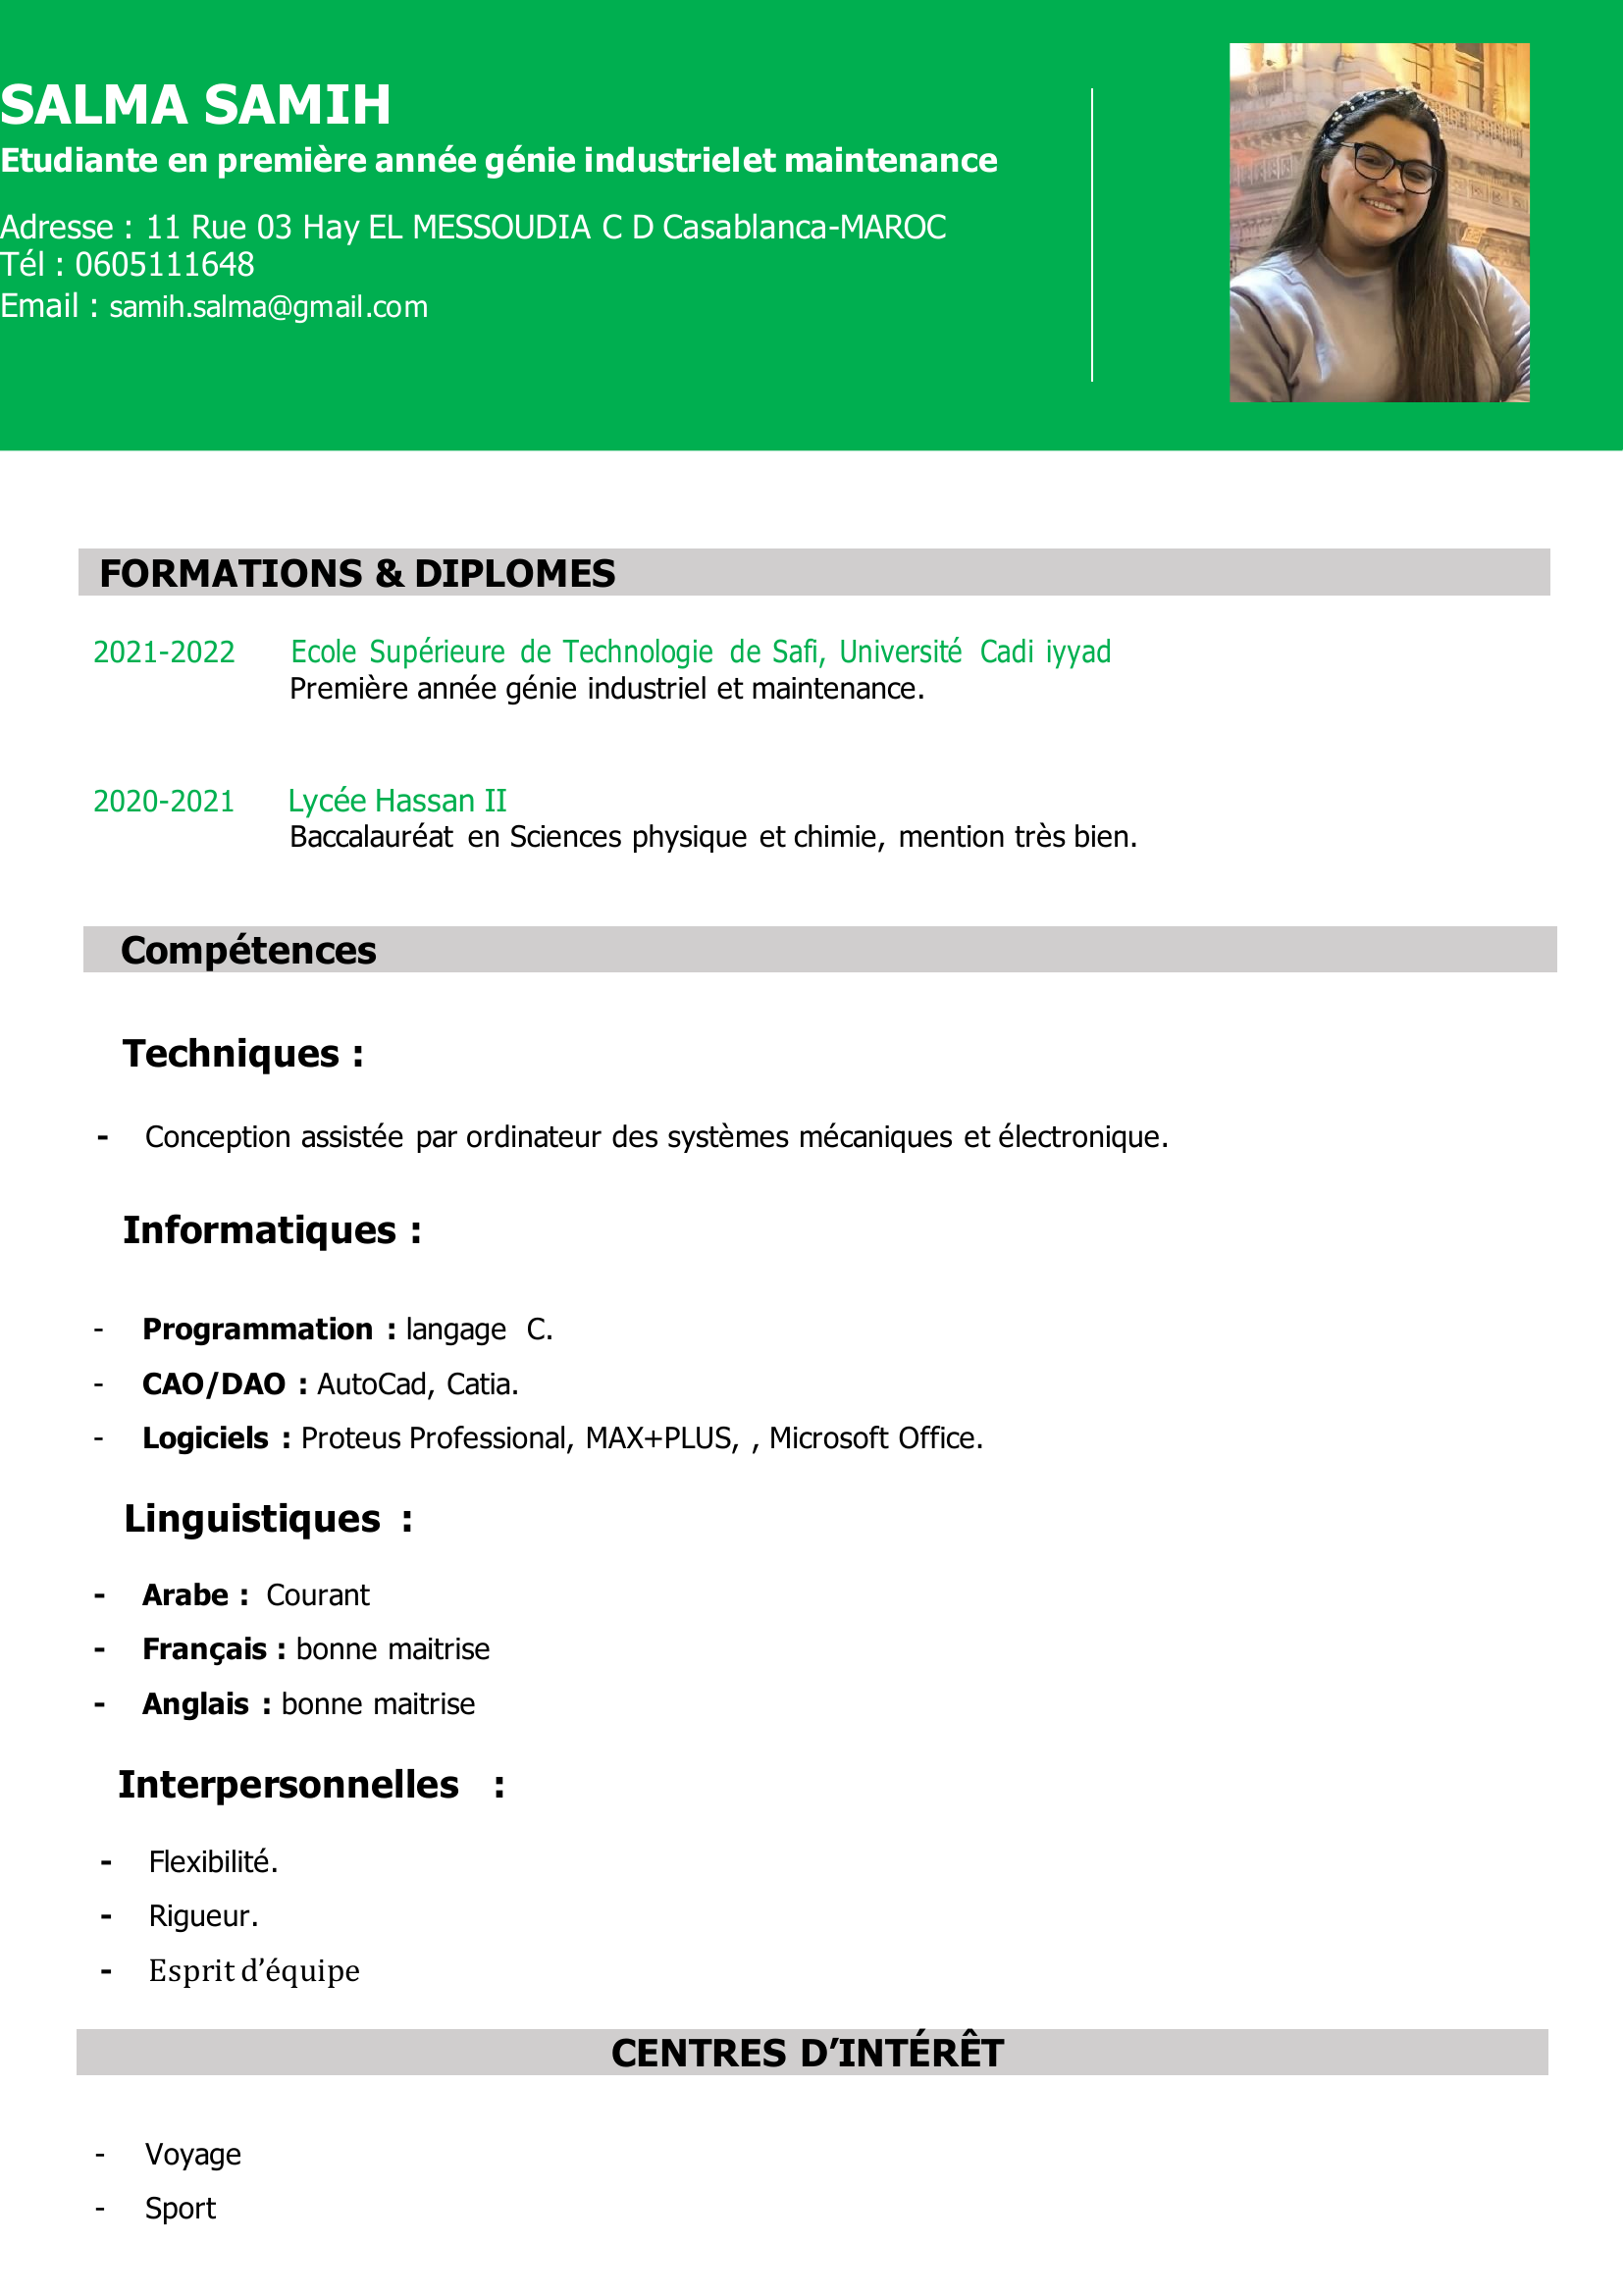

In [7]:
from IPython.display import display, Image
display(images[0])

In [9]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)


In [10]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

SALMA SAMIH
Etudiante en première année génie industrielet maintenance
Adresse
11 Rue 03 Hay EL MESSOUDIA C D Casablanca-MAROC
Tél : 0605111648
Email : samih.salma@gmail .com
FORMATIONS & DIPLOMES
2021-2022
Ecole Supérieure de Technologie de Safi, Université   Cadi iyyad
Première année génie industriel et maintenance _
2020-2021
Lycée Hassan II
Baccalauréat en Sciences physique et chimie; mention très bien.
Compétences
Techniques
Conception assistée par ordinateur des systèmes mécaniques et électronique.
Informatiques
Programmation
langage C.
CAO/DAO
AutoCad, Catia.
Logiciels
Proteus Professional, MAX+PLUS,
Microsoft Office.
Linguistiques
Arabe
Courant
Français
bonne maitrise
Anglais
bonne maitrise
Interpersonnelles
Flexibilité.
Rigueur .
Espritdéquipe
CENTRES D'INTÉRÊT
Voyage
Sport



In [11]:
nlp=spacy.load('en_core_web_sm')

In [12]:
doc = nlp(text)

In [13]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)